In [ ]:
import sys
sys.path.append('..')
py_file_location = "/content/drive/My Drive/32130 FDA/assg3"
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

import numpy as np
import pandas as pd
import seaborn as sns

from utils import *

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data exploration

In [ ]:
missing_values = ['?', '.', '', ' ', '_', 'Na', 'NULL', 'null', 'not', 'Not', 'NaN', 'NA', '??', 'nan', 'inf']
# Construct the full path to the CSV file
file_path = f"{py_file_location}/train_subset.csv"
raw_data = pd.read_csv(file_path, na_values=missing_values)
raw_data.set_index('id', inplace=True)

# Columns where '0' should NOT be considered a missing value
exclude_zero_cols = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# Identify columns where '0' should be considered a missing value
include_zero_cols = [col for col in raw_data.columns if col not in exclude_zero_cols]

# Replace '0' with NaN in the specified columns
for col in include_zero_cols:
    if raw_data[col].dtype in ['int64', 'float64']: # Only apply to numeric columns
        raw_data[col] = raw_data[col].replace(0, np.nan)
    elif raw_data[col].dtype == 'object': # Handle object type columns which might contain '0' as a string
         raw_data[col] = raw_data[col].replace('0', np.nan)


# drop ID column that unneccessary in the dataset
#raw_data = raw_data.drop(['id'], axis=1)


print('Number of entries:', raw_data.shape[0])
print('Number of attributes:', raw_data.shape[1])

Number of entries: 83123
Number of attributes: 23


In [ ]:
X = raw_data.drop(['satisfaction'], axis=1) # Set X to all columns except the target
Y = raw_data['satisfaction'].str.strip().str.upper() # Set Y to the target column
sa_type_counts = Y.value_counts()
# the percent overall
sa_type_counts = sa_type_counts.div(len(Y)).mul(100).round(2)

print(f'{X.shape[1]} features and 1 target column:\n{X.columns}')
sa_type_counts


22 features and 1 target column:
Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


,count
satisfaction,
NEUTRAL OR DISSATISFIED,56.67
SATISFIED,43.33


In [ ]:
import io
from IPython.display import display_html # Import display_html

buffer = io.StringIO() # Create a buffer to hold the output and capture the info of DataFrame into a string
raw_data.info(buf=buffer) # Check data types and missing values and
info_str = buffer.getvalue().replace("<class 'pandas.core.frame.DataFrame'>\n", '')

display_html(f"""
    <div style='width:30%; float: left; overflow-x: auto;'>
        <pre>{info_str}</pre>
    </div>
    <div style='width:70%; float: right; overflow-x: auto;'>
        {raw_data.head(15).round(2).to_html()}
    </div>
""", raw=True) # Display the info and head side by side

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,,,
107529,Female,Loyal Customer,47,Business travel,Business,1521,3.0,3.0,3.0,3.0,5.0,4.0,5,4.0,4.0,4.0,4,4,4.0,3.0,0,0.0,satisfied
129312,Male,disloyal Customer,35,Business travel,Business,2586,3.0,3.0,3.0,4.0,3.0,3.0,5,3.0,5.0,5.0,5,5,4.0,3.0,0,0.0,neutral or dissatisfied
42352,Female,Loyal Customer,66,Personal Travel,Eco,550,2.0,4.0,2.0,2.0,5.0,4.0,5,4.0,4.0,2.0,4,3,4.0,5.0,78,82.0,neutral or dissatisfied
33349,Male,disloyal Customer,26,Business travel,Eco,1269,5.0,4.0,4.0,1.0,3.0,5.0,3,3.0,5.0,1.0,5,3,4.0,3.0,0,0.0,satisfied
92993,Male,Loyal Customer,48,Personal Travel,Eco,738,1.0,5.0,NaN,2.0,4.0,NaN,4,4.0,5.0,2.0,4,3,5.0,4.0,64,49.0,neutral or dissatisfied
58318,Female,Loyal Customer,46,Business travel,Eco,1739,1.0,3.0,3.0,3.0,4.0,3.0,2,1.0,1.0,1.0,1,1,1.0,3.0,36,4.0,neutral or dissatisfied
129493,Female,Loyal Customer,14,Personal Travel,Eco Plus,2704,1.0,5.0,1.0,3.0,5.0,1.0,5,5.0,4.0,3.0,3,5,4.0,5.0,0,0.0,neutral or dissatisfied
68191,Female,disloyal Customer,22,Business travel,Eco Plus,597,2.0,4.0,2.0,3.0,3.0,2.0,3,3.0,4.0,2.0,3,3,3.0,3.0,12,8.0,neutral or dissatisfied
111214,Male,disloyal Customer,42,Business travel,Eco,1419,3.0,3.0,3.0,3.0,1.0,3.0,1,1.0,4.0,5.0,2,4,2.0,1.0,0,0.0,neutral or dissatisfied


In [ ]:
# Categorical columns
categorical_cols = ['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']

# Identify numerical columns by excluding categorical columns and 'id'
numerical_cols = raw_data.select_dtypes(include=np.number).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in categorical_cols + ['id']]

X = raw_data.drop(['satisfaction'], axis=1) # Set X to all columns except the target
Y = raw_data['satisfaction']

summary = stats_summary(raw_data[numerical_cols]).round(2)
display(summary)

,count,mean,std,min,25%,50%,75%,max,variance,iqr_size,skewness,kurtosis,nulls_count,outliers_count,nulls_percent,outliers_percent
Age,83123.0,39.39,15.13,7.0,27.0,40.0,51.0,85.0,228.84,24.0,-0.00,-0.72,0,0,0.0,0.00
Flight Distance,83123.0,1186.76,995.23,31.0,414.0,840.0,1739.0,4983.0,990475.03,1325.0,1.11,0.28,0,1886,0.0,2.27
Departure Delay in Minutes,83123.0,14.88,38.47,0.0,0.0,0.0,12.0,1592.0,1480.24,12.0,6.81,105.11,0,11604,0.0,13.96
Arrival Delay in Minutes,82874.0,15.26,38.93,0.0,0.0,0.0,13.0,1584.0,1515.76,13.0,6.66,99.06,249,11193,0.3,13.51


In [ ]:
#count the categorical columns
for col in categorical_cols:
    value_counts_1 = raw_data[col].value_counts()
    #print(f"Value counts for column '{col}':")
    print(value_counts_1)
    print('---------')

#count the object data
obj_cols = raw_data.select_dtypes(include='object').columns.tolist()
for col in obj_cols:
    value_counts_2 = raw_data[col].value_counts()
    print(value_counts_2)
    print('++++++++')


Inflight wifi service
3.0    20743
2.0    20619
4.0    15841
1.0    14281
5.0     9188
Name: count, dtype: int64
---------
Departure/Arrival time convenient
4.0    20460
5.0    17959
3.0    14311
2.0    13735
1.0    12382
Name: count, dtype: int64
---------
Ease of Online booking
3.0    19538
2.0    19208
4.0    15683
1.0    14041
5.0    11091
Name: count, dtype: int64
---------
Gate location
3.0    22853
4.0    19515
2.0    15617
1.0    13978
5.0    11159
Name: count, dtype: int64
---------
Food and drink
4.0    19421
3.0    17906
5.0    17862
2.0    17555
1.0    10291
Name: count, dtype: int64
---------
Online boarding
4.0    24599
3.0    17452
5.0    16549
2.0    14044
1.0     8537
Name: count, dtype: int64
---------
Seat comfort
4    25314
5    21140
3    15043
2    11933
1     9693
Name: count, dtype: int64
---------
Inflight entertainment
4.0    23418
5.0    20220
3.0    15376
2.0    14155
1.0     9941
Name: count, dtype: int64
---------
On-board service
4.0    24591
5.0    18983

## I. DATA PREPROCESSING & TRANSFORMATION

#1. Target encoding

In [ ]:
#binarise the satisfaction variable using mapping
satisfaction_mapping = {'neutral or dissatisfied': 0, 'satisfied': 1}
raw_data['satisfaction-binary'] = raw_data['satisfaction'].map(satisfaction_mapping)

#count the binary value
print(raw_data['satisfaction-binary'].value_counts())
#print satisfaction and satisfaction-binary column
display(raw_data[['satisfaction', 'satisfaction-binary']])

satisfaction-binary
0    47103
1    36020
Name: count, dtype: int64


,satisfaction,satisfaction-binary
id,,
107529,satisfied,1
129312,neutral or dissatisfied,0
42352,neutral or dissatisfied,0
33349,satisfied,1
92993,neutral or dissatisfied,0
...,...,...
117284,neutral or dissatisfied,0
4359,satisfied,1
7175,satisfied,1


#2. Data Splitting

In [ ]:
# split the dataset into training and testing subsets with ratio 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,raw_data['satisfaction-binary'], test_size=0.2, stratify=raw_data['satisfaction-binary'], random_state=42)

print("Training set:", X_train.shape, "Test set:", X_test.shape)

# Get value counts for train and test sets
y_train_counts = y_train.value_counts()
y_test_counts = y_test.value_counts()
Y_cnts = raw_data['satisfaction-binary'].value_counts()


# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Original Data': [*Y_cnts, sum(Y_cnts), f'{Y_cnts[0] / Y_cnts[1]:.5f}'],
    'Training Set': [*y_train_counts, sum(y_train_counts), f'{y_train_counts[0] / y_train_counts[1]:.5f}'],
    'Test Set': [*y_test_counts, sum(y_test_counts), f'{y_test_counts[0] / y_test_counts[1]:.5f}'],
}, index=[*raw_data['satisfaction-binary'].unique(), 'Total', 'Ratio']).T

# Print the comparison DataFrame
print(comparison_df)

Training set: (66498, 22) Test set: (16625, 22)
                   1      0  Total    Ratio
Original Data  47103  36020  83123  1.30769
Training Set   37682  28816  66498  1.30768
Test Set        9421   7204  16625  1.30775


# 3. handling missing value

In [ ]:
# Checking all columns with missing values, print number of missing count and missing percent

missing_cols = X_train.columns[X_train.isna().any()].tolist()
if missing_cols:
    missing_summary = X_train[missing_cols].isnull().sum().reset_index()
    missing_summary.columns = ['column_name', 'nulls_count']
    missing_summary['nulls_percent'] = ((missing_summary['nulls_count'] / len(X_train)) * 100).round(2)
    display(missing_summary.sort_values('nulls_count', ascending=False))
else:
    print("No missing values in training set.")
print('--------------')

#missing value in X_test
missing_cols_t = X_test.columns[X_test.isna().any()].tolist()
if missing_cols_t:
    missing_summary = X_test[missing_cols_t].isnull().sum().reset_index()
    missing_summary.columns = ['column_name', 'nulls_count']
    missing_summary['nulls_percent'] = ((missing_summary['nulls_count'] / len(X_test)) * 100).round(2)
    display(missing_summary.sort_values('nulls_count', ascending=False))
else:
    print("No missing values in test set.")

#using SimpleImputer to handle the missing value for all missing_cols
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')

# Fit on training set
median_imputer.fit(X_train[missing_cols])

# Transform both train and test using training medians
X_train[missing_cols] = median_imputer.transform(X_train[missing_cols])
X_test[missing_cols] = median_imputer.transform(X_test[missing_cols])

# Check results
print("Remaining missing values in training set:")
print(X_train.isnull().sum().sum())
print("Remaining missing values in test set:")
print(X_test.isnull().sum().sum())

import joblib
joblib.dump(median_imputer, 'median_imputer.pkl')


,column_name,nulls_count,nulls_percent
1,Departure/Arrival time convenient,3405,5.12
2,Ease of Online booking,2861,4.30
0,Inflight wifi service,1949,2.93
5,Online boarding,1558,2.34
8,Leg room service,298,0.45
11,Arrival Delay in Minutes,200,0.30
4,Food and drink,73,0.11
6,Inflight entertainment,10,0.02
10,Cleanliness,7,0.01
7,On-board service,3,0.00


--------------


,column_name,nulls_count,nulls_percent
1,Departure/Arrival time convenient,871,5.24
2,Ease of Online booking,701,4.22
0,Inflight wifi service,502,3.02
4,Online boarding,384,2.31
6,Leg room service,73,0.44
8,Arrival Delay in Minutes,49,0.29
3,Food and drink,15,0.09
5,Inflight entertainment,3,0.02
7,Cleanliness,3,0.02


Remaining missing values in training set:
0
Remaining missing values in test set:
0


['median_imputer.pkl']

In [ ]:
# #using SimpleImputer to handle the missing value for all missing_cols
# from sklearn.impute import SimpleImputer
# median_imputer = SimpleImputer(strategy='median')

# # Fit on training set
# median_imputer.fit(X_train[missing_cols])

# # Transform both train and test using training medians
# X_train[missing_cols] = median_imputer.transform(X_train[missing_cols])
# X_test[missing_cols] = median_imputer.transform(X_test[missing_cols])

# # Check results
# print("Remaining missing values in training set:")
# print(X_train.isnull().sum().sum())
# print("Remaining missing values in test set:")
# print(X_test.isnull().sum().sum())



#4. Outlier handling

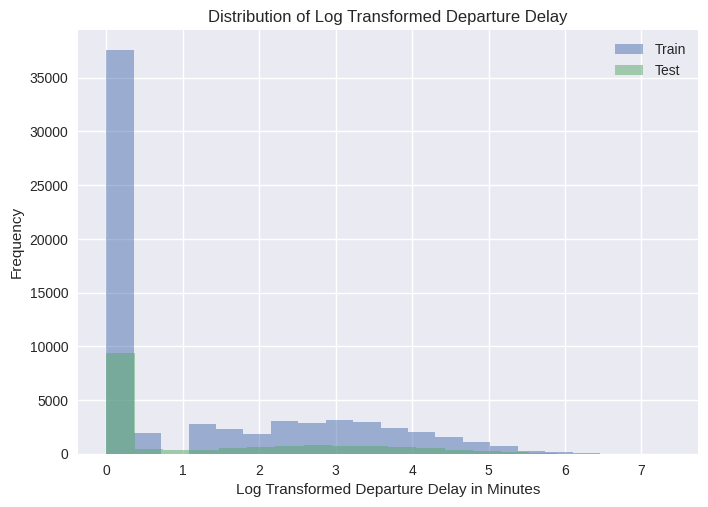

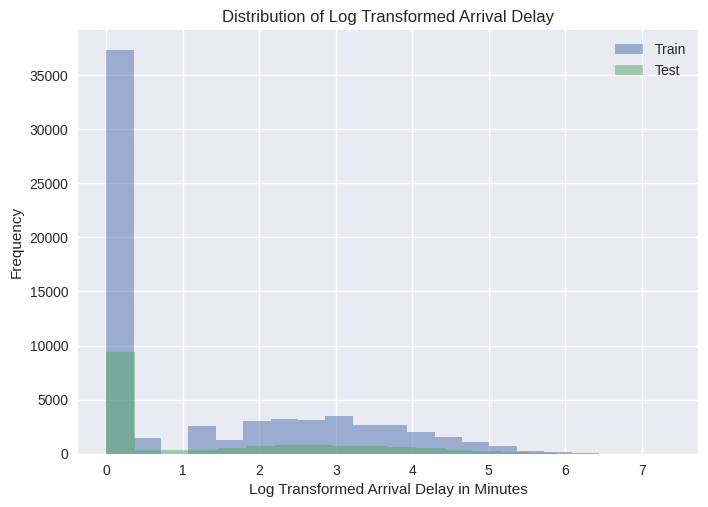

In [ ]:
#handle outliers of 2 variables: departure delay delay in minutes and arrival delay in minutes, using log transformation
for col in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    # Safety check for negative values
    assert (X_train[col] < 0).sum() == 0, f"{col} has negative values!"
    X_train[col] = np.log1p(X_train[col])  # log(1 + x) to handle zeros
    X_test[col] = np.log1p(X_test[col])

#visualization the after log transformation dataset
plt.hist(X_train['Departure Delay in Minutes'], bins=20, alpha=0.5, label='Train')
plt.hist(X_test['Departure Delay in Minutes'], bins=20, alpha=0.5, label='Test')
plt.xlabel('Log Transformed Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Departure Delay')
plt.legend()
plt.show()

plt.hist(X_train['Arrival Delay in Minutes'], bins=20, alpha=0.5, label='Train')
plt.hist(X_test['Arrival Delay in Minutes'], bins=20, alpha=0.5, label='Test')
plt.xlabel('Log Transformed Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Log Transformed Arrival Delay')
plt.legend()
plt.show()



In [ ]:
#apply robustScaler to departure delay and arrival delay after log-transformation
from sklearn.preprocessing import RobustScaler
scaler_robust = RobustScaler()

# Update column names to reflect the 'remainder__' prefix after one-hot encoding
#departure_col = 'remainder__Departure Delay in Minutes'
#arrival_col = 'remainder__Arrival Delay in Minutes'

for col in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
    scaler_robust = RobustScaler()
    scaler_robust.fit(X_train[[col]])
    X_train[col + '-r'] = scaler_robust.transform(X_train[[col]])
    X_test[col + '-r'] = scaler_robust.transform(X_test[[col]])

summary = stats_summary(X_train[[col + '-r' for col in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']]]).round(2)
display(summary)

joblib.dump(scaler_robust, 'scaler_robust.pkl')


,count,mean,std,min,25%,50%,75%,max,variance,iqr_size,skewness,kurtosis,nulls_count,outliers_count,nulls_percent,outliers_percent
Departure Delay in Minutes-r,66498.0,0.48,0.63,0.0,0.0,0.0,1.0,2.80,0.40,1.0,0.92,-0.55,0,11,0.0,0.02
Arrival Delay in Minutes-r,66498.0,0.48,0.62,0.0,0.0,0.0,1.0,2.71,0.38,1.0,0.87,-0.63,0,6,0.0,0.01


['scaler_robust.pkl']

#5. Normalization

In [ ]:
#using z-score to normalization the flight distance variable
from sklearn.preprocessing import StandardScaler
scaler_standard = StandardScaler()
scaler_standard.fit(X_train[['Flight Distance']])
X_train[['Flight Distance-z']] = scaler_standard.transform(X_train[['Flight Distance']])
X_test[['Flight Distance-z']] = scaler_standard.transform(X_test[['Flight Distance']])

#print flight distance in raw dataset and after normalization
print(raw_data[['Flight Distance']])
print(X_train[['Flight Distance-z']])
print(X_test[['Flight Distance-z']])

joblib.dump(scaler_standard, 'scaler_standard.pkl')


        Flight Distance
id                     
107529             1521
129312             2586
42352               550
33349              1269
92993               738
...                 ...
117284              368
4359                473
7175                135
55289              1585
112886             1164

[83123 rows x 1 columns]
        Flight Distance-z
id                       
2155             1.679582
45753           -0.976491
97353           -0.317246
47586            0.047549
63520           -0.179569
...                   ...
26925            0.585196
95941           -0.119272
10574           -0.963427
49878           -0.828764
123679          -0.978501

[66498 rows x 1 columns]
        Flight Distance-z
id                       
60957           -0.301167
70706           -0.515221
72003            0.253563
118001          -0.826754
57909           -0.887051
...                   ...
53004            0.020416
119213          -0.935288
123619          -0.978501
111245      

['scaler_standard.pkl']

#6. Age Discretise

In [ ]:
#discretise Age attribute into 5 categories
#import discretise
#from sklearn.preprocessing import KBinsDiscretizer

# Discretize 'Age' into 5 categories
# Define the age bin edges
age_bins = [0, 21, 35, 45, 65, float('inf')]
age_labels = [0,1,2,3,4] # Define the age categories
X_train['Age_Group'] = pd.cut(X_train['Age'], bins=age_bins, labels=age_labels)
X_test['Age_Group'] = pd.cut(X_test['Age'], bins=age_bins, labels=age_labels)

# Calculate the frequency of each category, add min, max, mean of each category only on training set
age_freq = X_train['Age_Group'].value_counts(normalize=True)
age_stats = X_train.groupby('Age_Group')['Age'].agg(['min', 'max', 'mean'])
print(age_stats)
print("----")

#print the new dataset
print('Train dataset')
print(X_train[['Age_Group']])
print('-----')
print('Test dataset')
print(X_test[['Age_Group']])

joblib.dump(age_bins, 'age_bins.pkl')


           min  max       mean
Age_Group                     
0            7   21  15.268794
1           22   35  27.986788
2           36   45  40.507289
3           46   65  53.818064
4           66   85  69.236154
----
Train dataset
       Age_Group
id              
2155           1
45753          3
97353          3
47586          1
63520          0
...          ...
26925          1
95941          1
10574          1
49878          1
123679         2

[66498 rows x 1 columns]
-----
Test dataset
       Age_Group
id              
60957          1
70706          2
72003          3
118001         3
57909          3
...          ...
53004          1
119213         3
123619         3
111245         3
64627          1

[16625 rows x 1 columns]


['age_bins.pkl']

In [ ]:
# #label encode the age discretized result
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# X_train['Age_Group'] = label_encoder.fit_transform(X_train['Age_Group'])
# X_test['Age_Group'] = label_encoder.transform(X_test['Age_Group'])

# #display a sample of encode dataset
# print(X_train[['Age_Group']])
# print(X_test[['Age_Group']])

# joblib.dump(label_encoder, 'label_encoder.pkl')



        Age_Group
id               
2155            0
45753           3
97353           3
47586           0
63520           4
...           ...
26925           0
95941           0
10574           0
49878           0
123679          1

[66498 rows x 1 columns]
        Age_Group
id               
60957           0
70706           1
72003           3
118001          3
57909           3
...           ...
53004           0
119213          3
123619          3
111245          3
64627           0

[16625 rows x 1 columns]


['label_encoder.pkl']

In [ ]:
#drop age column
X_train = X_train.drop(['remainder__Age'], axis=1)
X_test = X_test.drop(['remainder__Age'], axis=1)

#7. Object variables encode

In [ ]:
# Step 6: One-hot encode categorical columns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

object_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
one_hot_encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer(
    transformers=[('cat', one_hot_encoder, object_cols)],
    remainder='passthrough'
)

# Fit on training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)



# Convert to DataFrame with proper column names
X_train = pd.DataFrame(X_train_encoded, columns=preprocessor.get_feature_names_out())
X_test = pd.DataFrame(X_test_encoded, columns=preprocessor.get_feature_names_out())

# No imputation here! Step 3 already handled numeric missing values.
joblib.dump(one_hot_encoder, 'one_hot_encoder.pkl')

['one_hot_encoder.pkl']

In [ ]:
# export new dataset after preprocessing
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [ ]:
#print new dataset head
print(X_train.head())


   cat__Gender_Male  cat__Customer Type_disloyal Customer  \
0               0.0                                   0.0   
1               1.0                                   0.0   
2               0.0                                   0.0   
3               1.0                                   0.0   
4               0.0                                   1.0   

   cat__Type of Travel_Personal Travel  cat__Class_Eco  cat__Class_Eco Plus  \
0                                  0.0             0.0                  0.0   
1                                  0.0             1.0                  0.0   
2                                  0.0             1.0                  0.0   
3                                  0.0             1.0                  0.0   
4                                  0.0             1.0                  0.0   

   remainder__Flight Distance  remainder__Inflight wifi service  \
0                      2859.0                               3.0   
1                       

## II. MODELLING

#1. Initial testing

In [ ]:
%pip install catboost

In [ ]:
#Train all 7 models (from simple → complex) using default hyperparameters.
# Use Stratified Cross-Validation for fair evaluation.
# Evaluate with F1-score (main), plus Accuracy, ROC-AUC, Precision, Recall, and Confusion Matrix.
# Purpose: establish baseline and quickly identify which models are worth deeper optimization.

#import Logistic Regression, Decision Tree, Random Forest, XGBoost, LightGBM, CatBoost, AdaBoost
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier


#import cross-validation and metrics
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [ ]:
# Initializing classifiers with default parameters
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_jobs=-1),
    XGBClassifier(n_jobs=-1),
    LGBMClassifier(n_jobs=-1),
    CatBoostClassifier(verbose=0),
    AdaBoostClassifier()
]

In [ ]:
#define 5-fold stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#dictionary to store the results
results = []
conf_matrices = []

#evaluation loop
for model in classifiers:
  model_name = model.__class__.__name__
  print(f"Training {model_name}...")

  #perform cross-validation
  cv_results = cross_validate(
      model,
      X_train,
      y_train,
      cv=skf,
      scoring={'f1': 'f1_macro',
            'accuracy': 'accuracy',
            'precision': 'precision_macro',
            'recall': 'recall_macro',
            'roc_auc': 'roc_auc'},
      n_jobs=-1
  )

  #store mean scores
  results.append({
      'Model': model_name,
      'F1': np.mean(cv_results['test_f1']),
      'Accuracy': np.mean(cv_results['test_accuracy']),
      'Precision': np.mean(cv_results['test_precision']),
      'Recall': np.mean(cv_results['test_recall']),
      'ROC-AUC': np.mean(cv_results['test_roc_auc'])
  })

  #convert results to dataframe for comparision
  results_df = pd.DataFrame(results).sort_values(by='F1', ascending=False)
  results_df.set_index('Model', inplace=True)
  display(results_df)


Training LogisticRegression...


,F1,Accuracy,Precision,Recall,ROC-AUC
Model,,,,,
LogisticRegression,0.838352,0.840236,0.837191,0.840786,0.912156


Training DecisionTreeClassifier...


,F1,Accuracy,Precision,Recall,ROC-AUC
Model,,,,,
DecisionTreeClassifier,0.931416,0.932584,0.931102,0.931754,0.931754
LogisticRegression,0.838352,0.840236,0.837191,0.840786,0.912156


Training RandomForestClassifier...


,F1,Accuracy,Precision,Recall,ROC-AUC
Model,,,,,
RandomForestClassifier,0.950580,0.951713,0.953426,0.948400,0.990334
DecisionTreeClassifier,0.931416,0.932584,0.931102,0.931754,0.931754
LogisticRegression,0.838352,0.840236,0.837191,0.840786,0.912156


Training XGBClassifier...


,F1,Accuracy,Precision,Recall,ROC-AUC
Model,,,,,
XGBClassifier,0.956073,0.957021,0.958112,0.954414,0.993140
RandomForestClassifier,0.950580,0.951713,0.953426,0.948400,0.990334
DecisionTreeClassifier,0.931416,0.932584,0.931102,0.931754,0.931754
LogisticRegression,0.838352,0.840236,0.837191,0.840786,0.912156


Training LGBMClassifier...


,F1,Accuracy,Precision,Recall,ROC-AUC
Model,,,,,
LGBMClassifier,0.957034,0.958014,0.959853,0.954861,0.992970
XGBClassifier,0.956073,0.957021,0.958112,0.954414,0.993140
RandomForestClassifier,0.950580,0.951713,0.953426,0.948400,0.990334
DecisionTreeClassifier,0.931416,0.932584,0.931102,0.931754,0.931754
LogisticRegression,0.838352,0.840236,0.837191,0.840786,0.912156


Training CatBoostClassifier...


,F1,Accuracy,Precision,Recall,ROC-AUC
Model,,,,,
CatBoostClassifier,0.957986,0.958901,0.960150,0.956245,0.993477
LGBMClassifier,0.957034,0.958014,0.959853,0.954861,0.992970
XGBClassifier,0.956073,0.957021,0.958112,0.954414,0.993140
RandomForestClassifier,0.950580,0.951713,0.953426,0.948400,0.990334
DecisionTreeClassifier,0.931416,0.932584,0.931102,0.931754,0.931754
LogisticRegression,0.838352,0.840236,0.837191,0.840786,0.912156


Training AdaBoostClassifier...


,F1,Accuracy,Precision,Recall,ROC-AUC
Model,,,,,
CatBoostClassifier,0.957986,0.958901,0.960150,0.956245,0.993477
LGBMClassifier,0.957034,0.958014,0.959853,0.954861,0.992970
XGBClassifier,0.956073,0.957021,0.958112,0.954414,0.993140
RandomForestClassifier,0.950580,0.951713,0.953426,0.948400,0.990334
DecisionTreeClassifier,0.931416,0.932584,0.931102,0.931754,0.931754
AdaBoostClassifier,0.902458,0.904373,0.903297,0.901730,0.965504
LogisticRegression,0.838352,0.840236,0.837191,0.840786,0.912156


#2 Hyperparameter tunning

In [ ]:
# Focus models: CatBoost, LightGBM, XGBoost
# Optimize for F1-score (macro)

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np
import pandas as pd
import time

# Define parameter grids
param_grids = {
    # 'DecisionTreeClassifier': {
    #     'max_depth': randint(3, 30),
    #     'min_samples_split': randint(2, 10),
    #     'min_samples_leaf': randint(1, 5),
    #     'criterion': ['gini', 'entropy', 'log_loss']
    # },
    # 'RandomForestClassifier': {
    #     'n_estimators': randint(50, 300),
    #     'max_depth': randint(3, 30),
    #     'min_samples_split': randint(2, 10),
    #     'min_samples_leaf': randint(1, 5),
    #     'bootstrap': [True, False]
    # },
    'XGBClassifier': {
        'n_estimators': randint(50, 300),
        'max_depth': randint(3, 15),
        'learning_rate': uniform(0.01, 0.3),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4)
    },
    'LGBMClassifier': {
        'n_estimators': randint(50, 300),
        'num_leaves': randint(20, 100),
        'learning_rate': uniform(0.01, 0.3),
        'subsample': uniform(0.6, 0.4),
        'colsample_bytree': uniform(0.6, 0.4)
    },
    'CatBoostClassifier': {
        'depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.3),
        'iterations': randint(50, 300),
        'l2_leaf_reg': uniform(1, 10)
    }
}

# Initialize models
tuning_models = {
    # 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=42),
    # 'RandomForestClassifier': RandomForestClassifier(n_jobs=-1, random_state=42),
    'XGBClassifier': XGBClassifier(n_jobs=-1, random_state=42, eval_metric='logloss'),
    'LGBMClassifier': LGBMClassifier(n_jobs=-1, random_state=42),
    'CatBoostClassifier': CatBoostClassifier(verbose=0, random_state=42)
}

best_models = {}
tuned_results = []

for name, model in tuning_models.items():
    print(f"\n Tuning {name}...")

    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=30,                 # increase for more thorough search
        scoring='f1_macro',
        cv=5,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )

    #stat time
    start_time = time.time()

    random_search.fit(X_train, y_train)

    #end time
    end_time = time.time()
    duration = end_time - start_time

    #best model
    best_models[name] = random_search.best_estimator_

    tuned_results.append({
        'Model': name,
        'Best F1 (CV)': random_search.best_score_,
        'Best Params': random_search.best_params_,
        'Training Time (s)': round(duration, 2)
    })

# Display tuning summary
tuned_df = pd.DataFrame(tuned_results).sort_values(by='Best F1 (CV)', ascending=False)
display(tuned_df)




 Tuning XGBClassifier...
Fitting 5 folds for each of 30 candidates, totalling 150 fits

 Tuning LGBMClassifier...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 28816, number of negative: 37682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 66498, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433336 -> initscore=-0.268252
[LightGBM] [Info] Start training from score -0.268252

 Tuning CatBoostClassifier...
Fitting 5 folds for each of 30 candidates, totalling 150 fits


,Model,Best F1 (CV),Best Params,Training Time (s)
1,LGBMClassifier,0.959730,"{'colsample_bytree': 0.9329770563201687, 'learning_rate': 0.07370173320348283, 'n_estimators': 241, 'num_leaves': 79, 'subsample': 0.6733618039413735}",969.79
0,XGBClassifier,0.959084,"{'colsample_bytree': 0.6624074561769746, 'learning_rate': 0.05679835610086079, 'max_depth': 13, 'n_estimators': 252, 'subsample': 0.9464704583099741}",431.32
2,CatBoostClassifier,0.957250,"{'depth': 8, 'iterations': 268, 'l2_leaf_reg': 6.612434258477012, 'learning_rate': 0.12487806242613694}",894.96


In [ ]:
pd.set_option('display.max_colwidth', None)
tuned_df = pd.DataFrame(tuned_results).sort_values(by='Best F1 (CV)', ascending=False)
display(tuned_df)


,Model,Best F1 (CV),Best Params,Training Time (s)
1,LGBMClassifier,0.959730,"{'colsample_bytree': 0.9329770563201687, 'learning_rate': 0.07370173320348283, 'n_estimators': 241, 'num_leaves': 79, 'subsample': 0.6733618039413735}",969.79
0,XGBClassifier,0.959084,"{'colsample_bytree': 0.6624074561769746, 'learning_rate': 0.05679835610086079, 'max_depth': 13, 'n_estimators': 252, 'subsample': 0.9464704583099741}",431.32
2,CatBoostClassifier,0.957250,"{'depth': 8, 'iterations': 268, 'l2_leaf_reg': 6.612434258477012, 'learning_rate': 0.12487806242613694}",894.96


#3. Evaluate the best classifiers

Evaluate each best model on the test set (to get final accuracy, precision, recall, F1, etc.).

Draw confusion matrices for all 3 tuned models.
draw ROC curves

Compare them and pick the final champion model.


 Evaluating XGBClassifier on test set...
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9421
           1       0.97      0.94      0.95      7204

    accuracy                           0.96     16625
   macro avg       0.96      0.96      0.96     16625
weighted avg       0.96      0.96      0.96     16625



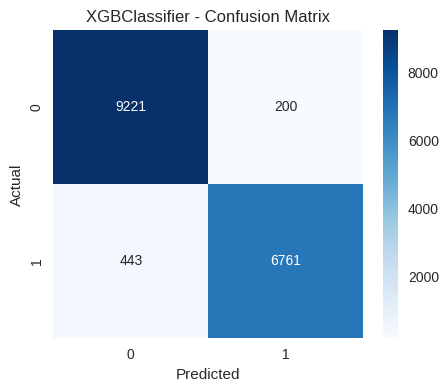


 Evaluating LGBMClassifier on test set...
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9421
           1       0.98      0.94      0.96      7204

    accuracy                           0.96     16625
   macro avg       0.97      0.96      0.96     16625
weighted avg       0.96      0.96      0.96     16625



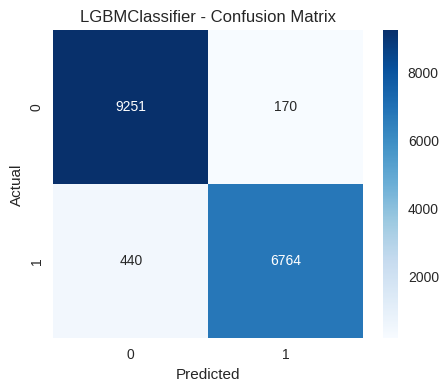


 Evaluating CatBoostClassifier on test set...
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9421
           1       0.97      0.94      0.95      7204

    accuracy                           0.96     16625
   macro avg       0.96      0.96      0.96     16625
weighted avg       0.96      0.96      0.96     16625



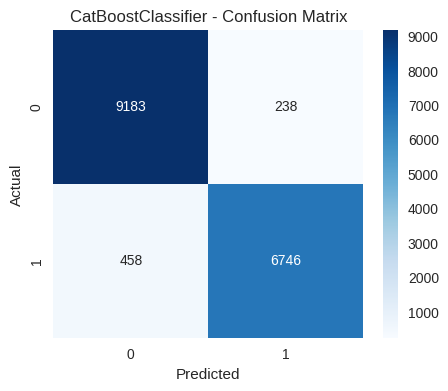

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
1,LGBMClassifier,0.963308,0.965040,0.960439,0.962468,0.994183
0,XGBClassifier,0.961323,0.962714,0.958639,0.960458,0.994052
2,CatBoostClassifier,0.958135,0.959208,0.955581,0.957216,0.993510


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Create list to store results
final_results = []

for name, model in best_models.items():
    print(f"\n Evaluating {name} on test set...")

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None and len(np.unique(y_test)) == 2 else np.nan

    final_results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1,
        'ROC-AUC': roc_auc
    })

    # Print classification report
    print(classification_report(y_test, y_pred))

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Compare all models
final_df = pd.DataFrame(final_results).sort_values(by='F1', ascending=False)
display(final_df)



 Combined Confusion Matrix for XGBClassifier


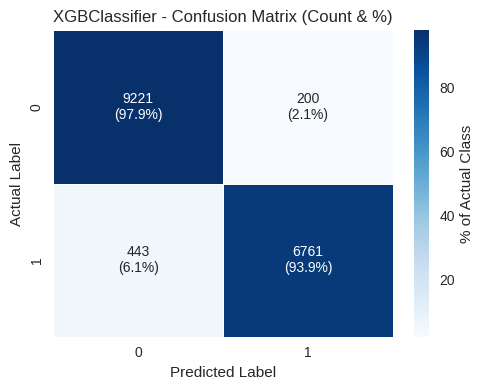


 Combined Confusion Matrix for LGBMClassifier


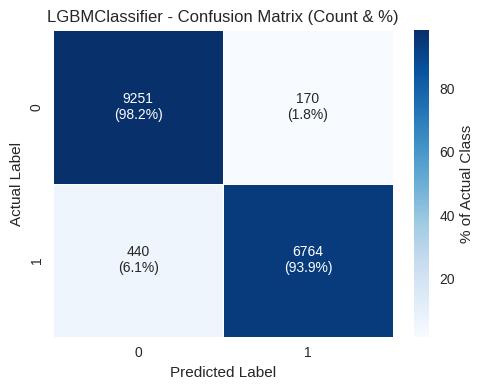


 Combined Confusion Matrix for CatBoostClassifier


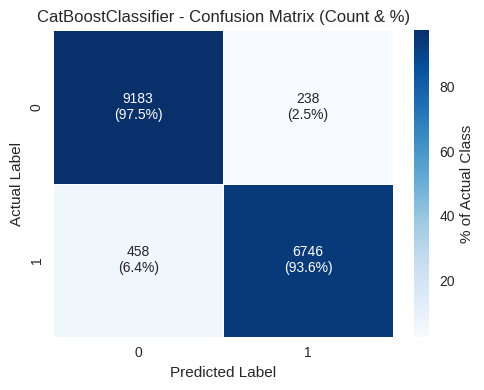

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

for name, model in best_models.items():
    print(f"\n Combined Confusion Matrix for {name}")

    # Predict test set
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Compute percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create combined labels: "count\n(%)"
    labels = np.array([
        [f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)" for j in range(cm.shape[1])]
        for i in range(cm.shape[0])
    ])

    # Plot
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_percent, annot=labels, fmt='', cmap='Blues', cbar=True,
                linewidths=0.5, linecolor='white', annot_kws={"size": 10})

    plt.title(f"{name} - Confusion Matrix (Count & %)")
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")

    # Colorbar label (optional)
    cbar = plt.gca().collections[0].colorbar
    cbar.set_label('% of Actual Class')

    plt.tight_layout()
    plt.show()


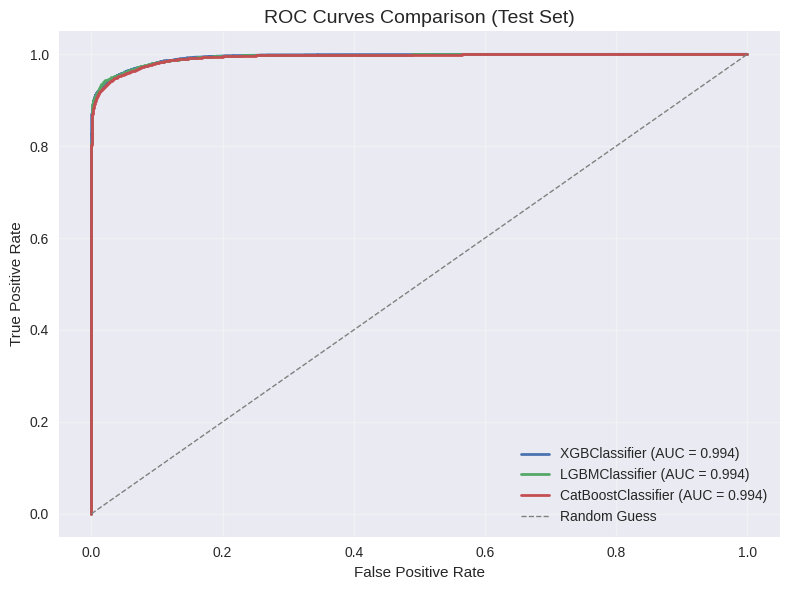

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

for name, model in best_models.items():
    # Ensure the model supports probability estimates
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # probability for positive class

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        # Plot
        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.3f})")

    else:
        print(f"{name} does not support probability predictions — skipping ROC curve.")

# Plot random chance line
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Guess')

# Customize the chart
plt.title("ROC Curves Comparison (Test Set)", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# save preprocessor + best model after training
import joblib

joblib.dump(median_imputer, 'median_imputer.pkl')
joblib.dump(scaler_robust, 'scaler_robust.pkl')
joblib.dump(scaler_standard, 'scaler_standard.pkl')
joblib.dump(age_bins, 'age_bins.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(one_hot_encoder, 'one_hot_encoder.pkl')

print("Preprocessors saved successfully.")

#Save the best trained model
best_model_name = 'LGBMClassifier'
best_model = best_models[best_model_name]

# Save the best model
joblib.dump(best_model, f'{best_model_name}_best_model.pkl')

print(f"Best trained model ({best_model_name}) saved successfully.")

Preprocessors saved successfully.
Best trained model (LGBMClassifier) saved successfully.


## III. APPLY ON UNKNOWN DATASET

In [ ]:
# Load the unknown dataset
py_file_location = "/content/drive/My Drive/32130 FDA/assg3"
file_path = f"{py_file_location}/unknown_set.csv"
missing_values = ['?', '.', '', ' ', '_', 'Na', 'NULL', 'null', 'not', 'Not', 'NaN', 'NA', '??', 'nan', 'inf']
unknown_data = pd.read_csv(file_path, na_values=missing_values)

# Set index if necessary
unknown_data.set_index('id', inplace=True)

In [ ]:
print(unknown_data.columns)

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')


In [ ]:
median_imputer = joblib.load('median_imputer.pkl')
scaler_robust = joblib.load('scaler_robust.pkl')
scaler_standard = joblib.load('scaler_standard.pkl')
age_bins = joblib.load('age_bins.pkl')
label_encoder = joblib.load('label_encoder.pkl')
one_hot_encoder = joblib.load('one_hot_encoder.pkl')

best_model = joblib.load('LGBMClassifier_best_model.pkl')